In [1]:
import matplotlib.pyplot as plt
import re
from sklearn.metrics import silhouette_score
from nltk.cluster import KMeansClusterer
import nltk
from sklearn.cluster import KMeans

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import random 

data = pd.read_json("preprocessingDoneRight.json")
data

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,noTags_punct,modded1_stemmed
0,202,NaN,False,253,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night david ...,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night...
1,3,NaN,False,2,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump appearing view tomorrow morning d...,donald trump will be appearing on the view tom...,donald trump appear view tomorrow morn ...
10,13,NaN,False,5,"""Don’t be afraid of being unique - it's like b...",5,2009,15,20,2009-05-17,"""don’t be afraid of being unique - it's like b...",afraid unique like afraid best self donald j t...,don t be afraid of being unique its like bein...,afraid uniqu like afraid best self dona...
100,3,NaN,False,15,The latest update on Bret Michaels is that he'...,5,2010,16,20,2010-05-20,the latest update on bret michaels is that he'...,latest update bret michaels hes making every e...,the latest update on bret michaels is that hes...,latest updat bret michael he make everi...
1000,11,NaN,False,71,China is driving the price of gold up in order...,1,2012,19,1,2012-01-05,china is driving the price of gold up in order...,china driving price gold order ease pressure i...,china is driving the price of gold up in order...,china drive price gold order eas pressu...
10000,95,NaN,False,42,"""@KevinMartinRI: I'm a big fan of the new @rea...",8,2013,3,31,2013-08-02,"""@kevinmartinri: i'm a big fan of the new @rea...",kevinmartinri im big fan new realdonaldtrump t...,kevinmartinri im a big fan of the new realdona...,kevinmartinri im big fan new realdonaldt...
10001,7,NaN,False,14,"""@bobbassman: @realDonaldTrump @anthonyolgin l...",8,2013,3,31,2013-08-02,"""@bobbassman: @realdonaldtrump @anthonyolgin l...",bobbassman realdonaldtrump like bush killed ki...,bobbassman realdonaldtrump like when bush ki...,bobbassman realdonaldtrump like bush kill...
10002,29,NaN,False,40,"""@robocosby: help me @realDonaldTrump I am dep...",8,2013,3,31,2013-08-02,"""@robocosby: help me @realdonaldtrump i am dep...",robocosby help realdonaldtrump depressed keep ...,robocosby help me realdonaldtrump i am depress...,robocosbi help realdonaldtrump depress ke...
10003,158,NaN,False,219,Isn't it sad the way Putin is toying with Obam...,8,2013,3,31,2013-08-02,isn't it sad the way putin is toying with obam...,isnt sad way putin toying obama regarding snow...,isnt it sad the way putin is toying with obama...,isnt sad way putin toy obama regard sn...
10004,21,NaN,False,24,"""@hattakzots: @realDonaldTrump you're one of t...",8,2013,3,31,2013-08-02,"""@hattakzots: @realdonaldtrump you're one of t...",hattakzots realdonaldtrump youre one voices re...,hattakzots realdonaldtrump youre one of the on...,hattakzot realdonaldtrump your one voic ...


In [2]:
#stemmed_words = pd.Series(' '.join(data['modded1']).split()).value_counts()
#print(len(stemmed_words))
#plt.hist(stemmed_words.values,bins=70,log=True)
#plt.show

In [3]:
#stemmed_words = stemmed_words[stemmed_words > 3]
#stemmed_words = stemmed_words[stemmed_words < 3000]
#plt.hist(stemmed_words.values,bins=70,log=True)
#plt.show

In [4]:
#data['m'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
#pd.Series(' '.join(data['m']).split()).value_counts()
#sentences = data[data["year"] == 2016]["m"].tolist()


In [5]:
#don't count words
#sentences = data[data["year"] == 2016]["noTags_punct"].tolist()

#pre-campaign
data1 = data[data["year"] <= 2016]
data1 = data1[data1["year"] >= 2015]
sentences = data1["noTags_punct"].tolist()
print(len(data1),len(sentences))
data1["year"].unique()
#sentences = data["noTags_punct"].tolist()

11739 11739


array([2015, 2016])

In [6]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['jaayzen', 'realdonaldtrump', 'thanks', 'donald', 'now', 'run', 'for', 'president', 'fulfill', 'your', 'purpose', 'to', 'much', 'is', 'given', 'much', 'is', 'required'], tags=[0]),
 TaggedDocument(words=['teamconquerca', 'first', 'time', 'in', 'thetrump', 'international', 'hotel', 'and', 'tower', 'and', 'its', 'absolutely', 'gorgeous', 'thankyou', 'sir', 'excellent', 'hospitality'], tags=[1]),
 TaggedDocument(words=['angelatn777', 'realdonaldtrump', 'he', 'stands', 'up', 'for', 'what', 'he', 'believes', 'in', 'regardless', 'if', 'all', 'people', 'like', 'it'], tags=[2]),
 TaggedDocument(words=['jaayzen', 'he', 'has', 'all', 'the', 'ingredients', 'to', 'get', 'elected', 'and', 'turn', 'this', 'this', 'ship', 'around', 'run', 'dont', 'let', 'us', 'hit', 'the', 'iceberg'], tags=[3]),
 TaggedDocument(words=['marcaardvark', 'realdonaldtrump', 'ronmeier123', 'one', 'of', 'the', 'best', 'things', 'i', 'bought', 'in', '2014', 'realdonaldtrump', 'ties', 'macys', 'amazon']

In [7]:
len(tagged_data)

11739

In [8]:
#model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=200, min_count=2, epochs=40)
model = Doc2Vec(vector_size=500, min_count=4, epochs=100)

model.build_vocab(tagged_data)


In [9]:
%%time 
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


CPU times: user 2min 30s, sys: 13.5 s, total: 2min 44s
Wall time: 1min 15s


In [10]:
%%time
#sentences = data[data["year"] == 2016]["noTags_punct"].tolist()
#tagged = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]

X = []
for i in range(0,len(tagged_data)):
    X.append( model.infer_vector(tagged_data[i].words))

CPU times: user 1min 20s, sys: 95 ms, total: 1min 21s
Wall time: 1min 21s


In [11]:
%%time
ranks = []
second_ranks = []
for doc_id in range(len(tagged_data)):
    inferred_vector = model.infer_vector(tagged_data[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])

CPU times: user 1h 37min 30s, sys: 3h 55min 29s, total: 5h 33min
Wall time: 13min 53s


In [12]:
import collections

collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus


Counter({0: 11257,
         6: 20,
         2: 60,
         12: 6,
         1: 163,
         31: 1,
         3: 42,
         8: 14,
         4: 29,
         16: 5,
         5: 23,
         15: 4,
         11: 8,
         7: 9,
         10: 10,
         9: 8,
         14: 6,
         45: 2,
         19: 6,
         254: 1,
         18: 5,
         23: 2,
         22: 4,
         26: 1,
         36: 2,
         20: 6,
         30: 2,
         24: 3,
         41: 1,
         13: 6,
         39: 1,
         25: 2,
         52: 1,
         21: 1,
         48: 2,
         17: 3,
         37: 2,
         2449: 1,
         51: 1,
         33: 1,
         69: 1,
         56: 1,
         50: 1,
         46: 1,
         28: 2,
         42: 1,
         53: 2,
         58: 2,
         91: 1,
         62: 1,
         35: 1,
         32: 1,
         263: 1,
         29: 1,
         8273: 1})

In [13]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]: 
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tagged_data[sims[index][0]].words)))


Document (11738): «rt realdonaldtrump happy birthday donaldjtrumpjr»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d500,n5,w5,mc4,s0.001,t3):

MOST (11738, 0.7891807556152344): «rt realdonaldtrump happy birthday donaldjtrumpjr»

SECOND-MOST (10697, 0.7686103582382202): «imwithyou americafirst»

MEDIAN (6750, 0.3584657907485962): «meganweaver321 realdonaldtrump alabama loves you great»

LEAST (3058, 0.0008306391537189484): «joetorre»



In [14]:
doc_id = random.randint(0, len(tagged_data) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(tagged_data[sim_id[0]].words)))


Train Document (2810): «stadiumjourney take a look at our review of trump national doral miami home of the cadillacchamp trumpdoral»

Similar Document (8721, 0.49395084381103516): «i will bring our jobs back to america fix our military and take care of our vets end common core and obamacare protect 2nd a build wall»



# hierachical


from sklearn.cluster import AgglomerativeClustering

#average 
#2 0.20235462
#3 0.17323813
#4 0.15857914
#5 0.15378755
#6 0.078243
#7 0.051599164
#8 0.036651324
#9 0.028211854


for c in range(2,10):
    clustering = AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=c)
    clustering.fit(X)
    labels = clustering.labels_
    d = silhouette_score(X, labels,metric='cosine')
    print(c,d)

clustering = AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=6)
clustering.fit(X)
assigned_clusters = clustering.labels_
d = silhouette_score(X, assigned_clusters,metric='cosine')

print(d)
NUM_CLUSTERS = 5

# kmeans

%%time

#solo per aveere un'idea di quanti cluster
sse_list = list()
max_k = 40
plt.figure(figsize=(18,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [15]:
%%time
#stemmed counted
#0.112 8 cluster 
#0.12 8 cluster con lunghezza vettore 100
#0.135 8 cluster con lunghezza vettore 200
#0.133 8 cluster con lunghezza vettore 300

#not stemmed counted
#0.135 8 cluster con lunghezza 100
#0.149 8 cluster con lunghezza 200
#0.148 8 cluster con lunghezza 300

#all words not stemmed, no stopwords
#0.114 6 cluster 100
#0.136 8 cluster 100
#0.122 8 cluster 200
#0.144 8 cluster 300


#5 cluster not stemmed, 300, full sembra faccia cluster nicely, 0.14 e passa 
#4 " ", 0.142

#doc2vec trained on whole dataset, lower silhouettes, words?
#4 0.66
#6 0.64

#4 0.79 500/min 4

#30 cluster su 2015/2016 silhouette 0.02 e passa
#10   0.028/0.28 non ho visto 
#15 0.027
#8 0.026
#5 0.026


NUM_CLUSTERS = 5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)

0.025907813
CPU times: user 26min 27s, sys: 2.79 s, total: 26min 30s
Wall time: 26min 11s


In [16]:
datak = data1
datak["labels"] = assigned_clusters

In [17]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
    print(len(c))
   # words = pd.Series(' '.join(c['m']).split()).value_counts()
    words = pd.Series(' '.join(c['modded1']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

1749
Cluster 0 dimension 1749
2138
Cluster 1 dimension 2138
2742
Cluster 2 dimension 2742
3714
Cluster 3 dimension 3714
1396
Cluster 4 dimension 1396


In [18]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

cluster  0 realdonaldtrump    463
trump              301
great              146
hillary            140
president          107
people             101
america             98
one                 90
going               82
like                80
dtype: int64
cluster  1 thank                    964
realdonaldtrump          747
trump2016                427
great                    413
makeamericagreatagain    293
trump                    209
america                  194
make                     134
vote                     128
thanks                   113
dtype: int64
cluster  2 realdonaldtrump    1778
trump              1059
donald              480
great               417
president           302
via                 205
america             161
vote                145
people              139
love                135
dtype: int64
cluster  3 great              425
trump              374
realdonaldtrump    324
hillary            269
america            215
make               203
people             

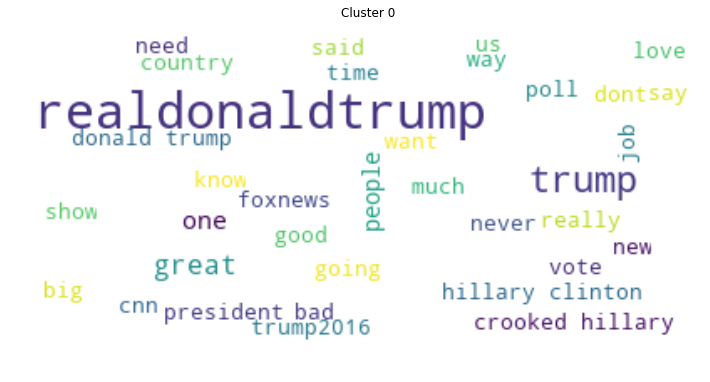

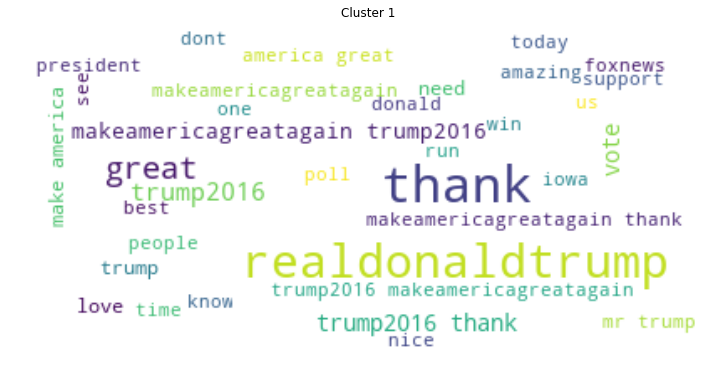

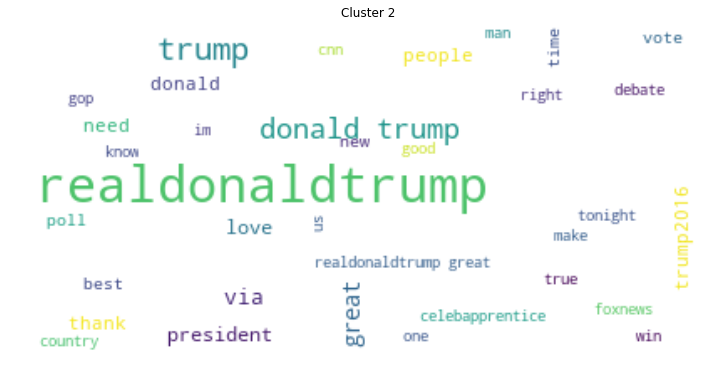

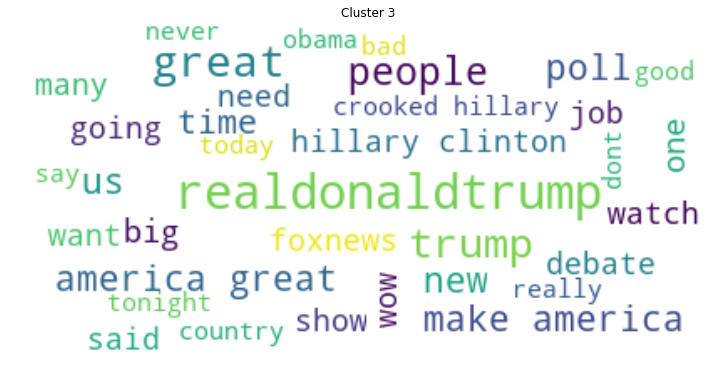

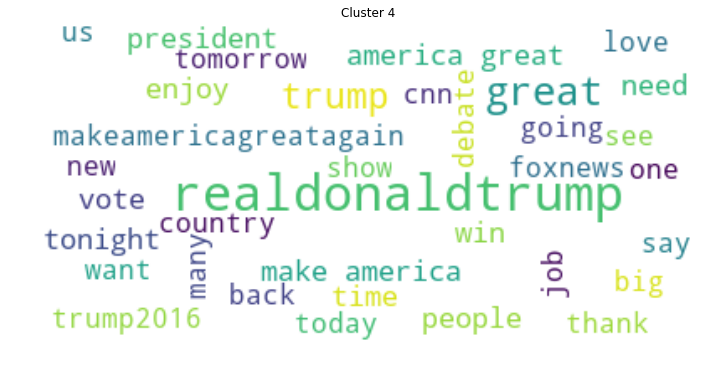

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in range(0,NUM_CLUSTERS):
    temp = datak[datak["labels"] == c] 
    print
    text = temp["modded1"]
    text = text.str.cat(sep=' ')

    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [20]:
#trova un modo di clusterizzare le cose assieme ai dati / sentiment analysis

In [21]:
datak.to_json("5campaignNew.json")